This test validates that zipin eval and zipin sample should be consistent.

zipinVersion:  Feng


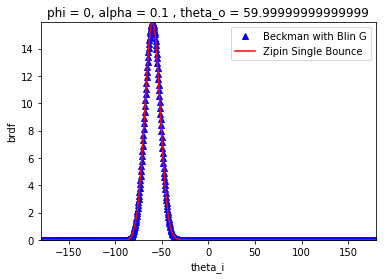

In [69]:
import sys;
sys.path.append('/usr/local/lib/python3.6/site-packages')
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

#critical value of alpha when the beckman starts to have double peak
alpha = .1

zipinVersion = 'Feng'
beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion);
theta_o = math.pi /3;

phi_i = phi_o = 0
wo = vec3.Vec3(math.sin(theta_o)* math.cos(phi_o), math.sin(theta_o) * math.sin(phi_o), math.cos(theta_o))
xdata= [];              
zdata=[]; 
bdata = [];
blindata = []
zsamples = []
bsamples = []
sampleCount = 1000
minAngle = -math.pi  
maxAngle = math.pi

rangeAngle = maxAngle - minAngle
maxBounce = 1
for i in range(1,sampleCount):
    thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = math.cos(thetaWi)
    wi = vec3.Vec3(math.sin(thetaWi)* math.cos(phi_i), math.sin(thetaWi) * math.sin(phi_i), mu)
    beval = beckman.Eval(wo, wi, 1)
    blin_eval = beckman.Eval(wo, wi, 2)
    zeval = zipin.Eval(wo, wi, 0, 0, maxBounce)
    bsamples.append(beval) 
    zsamples.append(zeval)
    xdata.append(math.degrees(thetaWi))
    bdata.append(beval[0])
    blindata.append(blin_eval[0])
    zdata.append(zeval[0])

#plt.plot(xdata, bdata, color = 'green');
plt.plot(xdata, blindata, 'b^', label="Beckman with Blin G");
plt.plot(xdata, zdata, 'r-', label='Zipin Single Bounce');
plt.legend(loc=1)
plt.xlabel('theta_i')
plt.ylabel('brdf')
titleString = 'phi = ' + repr(phi_o) + ', alpha = '+ repr(alpha) + ' , theta_o = '+ repr(math.degrees(theta_o))
plt.title(titleString)
#plt.title('phi={}'.format(phi_o) )                                                                                  
plt.autoscale(True, 'both', True)
plt.show()  



This is just a quick test for me to debug problem values of zipin evaluation

In [2]:
import sys;
sys.path.append('/usr/local/lib/python3.6/site-packages')
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

#critical value of alpha when the beckman starts to have double peak
alpha = .99

zipinVersion = 'Feng'
beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion);
maxBounce = 3
theta_o = math.pi /3;

phi_i = phi_o = 0
wo = vec3.Vec3(math.sin(theta_o)* math.cos(phi_o), math.sin(theta_o) * math.sin(phi_o), math.cos(theta_o))
print(wo)
theta_i = math.radians(0)
wi = vec3.Vec3(math.sin(theta_i)* math.cos(phi_o), math.sin(theta_i) * math.sin(phi_o), math.cos(theta_i))
print (wi)
zeval = zipin.Eval(wo, wi, phi_o, phi_i, maxBounce)
beval = beckman.Eval(wo, wi)
wm = (wo + wi).norm()
print(wm);


print (zeval)
print (beval)

zipinVersion:  Feng
Vec3(0.8660254037844386, 0.0, 0.5000000000000001)
Vec3(0.0, 0.0, 1.0)
Vec3(0.49999999999999994, 0, 0.8660254037844387) 1 left
0.29833093344707545 0.14916546672353775
[(-0.0, 0.9999999999999997, 1, 'left', 0.9999999999999999)]
Vec3(-0.5000000000000001, 0, 0.8660254037844386) 2 right
0.2983309334470751 0
[(-2.5444437451708134e-14, 0.9999999999999999, 1, 'left', 0.9999999999999999)]
Vec3(0.8660254037844386, 0, 0.5) 2 left
6.258443311606216e-05 1.5646108279015544e-05
[(-60.00000000000001, 1.0, 1, 'left', 0.5000000000000001)]
Vec3(0.5, 0.0, 0.8660254037844388)
(0.2983309334470754, 0.14916546672353773)
(0.29519596743509263, 0.14916546672353787)


In [1]:
import zipinPaper as zipin
z = zipin.zipin(20.000009999999996, 20.0)
print(z)


5 5
-1.7453292513458507e-06 -1.7453292513458507e-06
0.3420201215989058 0.34202030733296535 0.6840406146659307
[(-9.99999999628449e-05, 2.7152490004117356e-07, 5, 'right', 1.0), (-39.999939999999995, 0.4679128834370925, 3, 'left', 0.46791301048712597), (-7.999999998554258e-05, 0.5320868450380075, 4, 'left', 0.532086989512874)]


In [3]:
import sys;
sys.path.append('/usr/local/lib/python3.6/site-packages')
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;
alpha = .99

zipinVersion = 'Feng'
beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha,  zipinVersion);
maxBounce = 6
minBounce = 5
phi = 0

theta_i = math.radians(-8)
theta_o = math.radians(20)
wo = vec3.Vec3(math.sin(theta_o), 0, math.cos(theta_o))
wi = vec3.Vec3(math.sin(theta_i), 0, math.cos(theta_i))
#wo = vec3.Vec3(0.49999999999999994, 0.0, 0.8660254037844387);
#wi = vec3.Vec3(0.7664930068093501, 0.0, 0.6422526531765841);
zeval = zipin.Eval(wo, wi, 0, 0, maxBounce, minBounce);
print (zeval)

zipinVersion:  Feng
(2.764984987566873e-05, 1.2536614897362137e-05)
